# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [371]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file='./traffic-signs-data/valid.p'
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [372]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len (list(set(y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

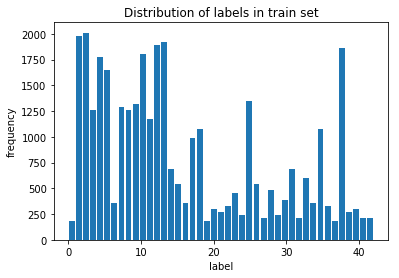

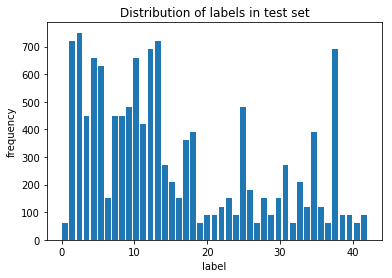

In [61]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

#Distribution of labels in train set
hist, bins = np.histogram(y_train, bins=n_classes)
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=0.8)
plt.ylabel("frequency")
plt.xlabel("label")
plt.title("Distribution of labels in train set")
plt.show()

#Distribution of labels in test set
hist, bins = np.histogram(y_test, bins=n_classes)
plt.bar(center, hist, align='center', width=0.8)
plt.ylabel("frequency")
plt.xlabel("label")
plt.title("Distribution of labels in test set")
plt.show()

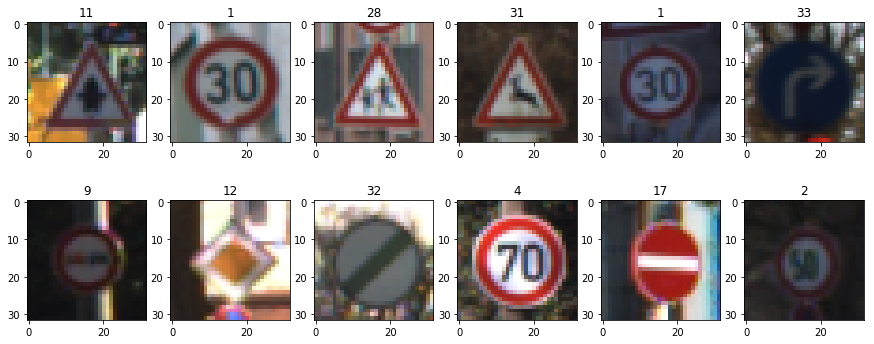

In [62]:
import random

#display random 10 images from train set
fig, axs = plt.subplots(2,6, figsize=(15, 6))
axs = axs.ravel()
for i in range(12):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [63]:
import cv2

def grayScale(data):
    return np.sum(data/3, axis=3, keepdims=True)

In [64]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = grayScale(X_train)

X_validation_rgb = X_validation
X_validation_gry = grayScale(X_validation)

X_test_rgb = X_test
X_test_gry = grayScale(X_test)

print('RGB:', X_train_rgb.shape)
print('Grayscale:', X_train_gry.shape)

RGB: (34799, 32, 32, 3)
Grayscale: (34799, 32, 32, 1)


In [65]:
X_train = X_train_gry
X_validation = X_validation_gry
X_test = X_test_gry

print('complete')

complete


In [66]:
#function to normalize the images
def normalize(data):
    return (data - 128)/ 128

In [67]:
## Normalize the train, validation and test data set

X_train_normalized = normalize(X_train)
X_validation_normalized = normalize(X_validation)
X_test_normalized = normalize(X_test)

In [68]:
# random rotate the image (for data augmentation)
def random_rotate(img):
    r_x = int(img.shape[0]/2)
    r_y = int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-20
    mat = cv2.getRotationMatrix2D((r_x, r_y), ang, 1.0)
    img = cv2.warpAffine(img, mat, img.shape[:2])
    img = img[:,:,np.newaxis]
    return img

In [69]:
# number of samples for each class in train dataset
print(np.bincount(y_train))
print("Training samples for each class:", min(np.bincount(y_train)))

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Training samples for each class: 180


In [373]:
# augmenting images to increase the dataset using random rotation

train_indices = []
augmented_data_indices = []

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 300:
        for i in range(300 - n_samples):
            train_indices.append(class_indices[0][i%n_samples])
            augmented_data_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = random_rotate(new_img)
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)
        

X, y shapes: (36599, 32, 32, 1) (35699,)


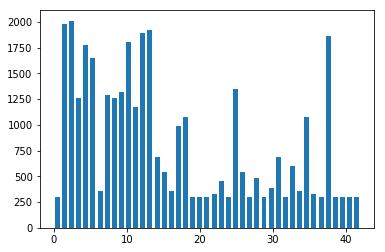

In [374]:
# Distribution after data augmentation
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [71]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)
X_validation_normalized, y_validation = shuffle(X_validation_normalized, y_validation)

X_train = X_train_normalized
X_validation = X_validation_normalized

print('complete')

complete


### Model Architecture

In [273]:
# Basic LeNet Architecture

from tensorflow.contrib.layers import flatten

import tensorflow as tf

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [301]:
#Final architecture
#Pierre Sermanet and Yann LeCun architecture for traffic signal classification.

def LeNet3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print ("conv1: ", conv1.shape)

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print ("conv1_pool: ", conv1.shape)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print ("conv2: ", conv2.shape)
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
#     conv2 = tf.nn.dropout(conv2, 0.9)
    print ("conv2_pool: ", conv2.shape)
     
    # SOLUTION: Layer 3: Convolutional. Input = 5x5x16. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    print ("conv3: ", conv3.shape)
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Flatten conv3. Input = 1x1x400. Output = 400.
    fc0   = flatten(conv3)
    print ("fc0: ", fc0.shape)
    
    # SOLUTION: Flatten conv2. Input = 5x5x16. Output = 400.
    fc1 = flatten(conv2)
    print ("fc1: ", fc1.shape)
    # Concat fc0 and fc1. Input = 400 + 400. Output = 800
    concat_layer = tf.concat([fc0, fc1], 1)
    print ("concat_layer: ", concat_layer.shape)
    # Dropout layer
    concat_layer = tf.nn.dropout(concat_layer, keep_prob)
    print ("concat_layer: ", concat_layer.shape)
    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(concat_layer, fc3_W) + fc3_b
    
    return logits

In [302]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 180

In [303]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

In [304]:
rate = 0.001

logits = LeNet3(x)
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

conv1:  (?, 28, 28, 6)
conv1_pool:  (?, 14, 14, 6)
conv2:  (?, 10, 10, 16)
conv2_pool:  (?, 5, 5, 16)
conv3:  (?, 1, 1, 400)
fc0:  (?, 400)
fc1:  (?, 400)
concat_layer:  (?, 800)
concat_layer:  (?, 800)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [305]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [306]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.742

EPOCH 2 ...
Validation Accuracy = 0.868

EPOCH 3 ...
Validation Accuracy = 0.899

EPOCH 4 ...
Validation Accuracy = 0.911

EPOCH 5 ...
Validation Accuracy = 0.920

EPOCH 6 ...
Validation Accuracy = 0.922

EPOCH 7 ...
Validation Accuracy = 0.937

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.935

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.942

EPOCH 12 ...
Validation Accuracy = 0.942

EPOCH 13 ...
Validation Accuracy = 0.940

EPOCH 14 ...
Validation Accuracy = 0.945

EPOCH 15 ...
Validation Accuracy = 0.951

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.954

EPOCH 18 ...
Validation Accuracy = 0.938

EPOCH 19 ...
Validation Accuracy = 0.947

EPOCH 20 ...
Validation Accuracy = 0.947

EPOCH 21 ...
Validation Accuracy = 0.950

EPOCH 22 ...
Validation Accuracy = 0.949

EPOCH 23 ...
Validation Accuracy = 0.947

EPOCH 24 ...
Validation Accura

In [307]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, './lenet')
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 1.000


In [308]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, './lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.875


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)


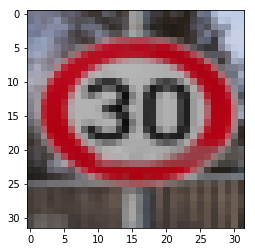

(32, 32, 3)


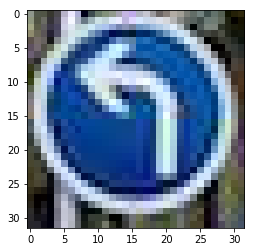

(32, 32, 3)


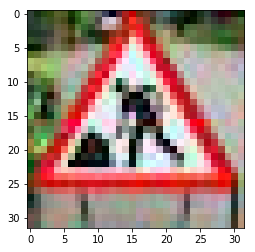

(32, 32, 3)


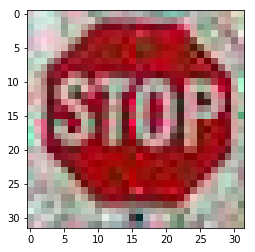

(32, 32, 3)


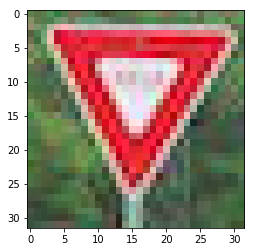

In [309]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg
from scipy.misc import imresize
import numpy as np
import matplotlib.pyplot as plt
import cv2

samplePics = os.listdir("sample/")
# Drop the mac's created '.DS_Store' file
samplePics = samplePics[1:8]

# Show the images, add to a list to process for classifying
samplePicsPixels = []
for i in samplePics:
    i = 'sample/' + i
    image = mpimg.imread(i)
    image = imresize(image, (32,32,3), interp='bilinear', mode=None)
    print (image.shape)
    plt.imshow(image)
    plt.show()
    samplePicsPixels.append(image)
 


In [310]:
# Make into numpy array for processing
samplePicsPixels = np.array(samplePicsPixels)
samplePicsPixels_gray = grayScale(samplePicsPixels)
samplePicsPixelsNorm = normalize(samplePicsPixels_gray)

### Predict the Sign Type for Each Image and Analyze Performance

In [311]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

actual_labels = [1, 34, 25, 14, 13]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver1 = tf.train.import_meta_graph('./lenet.meta')
    saver1.restore(sess, './lenet')
    sample_accuracy = evaluate(samplePicsPixelsNorm, actual_labels)
    print("Sample Accuracy = {:.3f}".format(sample_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Sample Accuracy = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [312]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: samplePicsPixelsNorm, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: samplePicsPixelsNorm, keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from ./lenet


In [313]:
my_top_k

TopKV2(values=array([[  1.00000000e+00,   1.61425255e-08,   1.36868463e-08,
          6.96060085e-11,   9.89471634e-13],
       [  9.48718071e-01,   5.12209758e-02,   4.05207647e-05,
          1.51851045e-05,   4.91357969e-06],
       [  9.99975801e-01,   2.41853377e-05,   1.13391088e-10,
          1.11743410e-11,   5.92239541e-14],
       [  9.99876022e-01,   6.85372070e-05,   5.37358865e-05,
          1.35562789e-06,   1.17503845e-07],
       [  1.00000000e+00,   1.28818164e-10,   2.86950541e-12,
          3.89120319e-16,   2.46028805e-18]], dtype=float32), indices=array([[ 1,  3,  2,  0,  5],
       [38, 34, 12, 13,  8],
       [18, 11,  1, 40, 12],
       [14, 13,  1,  8, 36],
       [13, 34, 35,  9, 25]], dtype=int32))

In [375]:
import pandas as pd

sign_file = pd.read_csv('./signnames.csv')


In [376]:
sign_name = []
for item in my_top_k.indices:
#     print (item)
    sign_name.append(([sign_file['SignName'][i] for i in item]))

l = []
for item in my_top_k.values:
    l.append(list(item))


for f, b in zip(l, sign_name):
    for n,g in zip(f,b):
       print(n,'\t',g)
    print("Next Image")

1.0 	 Speed limit (30km/h)
1.61425e-08 	 Speed limit (60km/h)
1.36868e-08 	 Speed limit (50km/h)
6.9606e-11 	 Speed limit (20km/h)
9.89472e-13 	 Speed limit (80km/h)
Next Image
0.948718 	 Keep right
0.051221 	 Turn left ahead
4.05208e-05 	 Priority road
1.51851e-05 	 Yield
4.91358e-06 	 Speed limit (120km/h)
Next Image
0.999976 	 General caution
2.41853e-05 	 Right-of-way at the next intersection
1.13391e-10 	 Speed limit (30km/h)
1.11743e-11 	 Roundabout mandatory
5.9224e-14 	 Priority road
Next Image
0.999876 	 Stop
6.85372e-05 	 Yield
5.37359e-05 	 Speed limit (30km/h)
1.35563e-06 	 Speed limit (120km/h)
1.17504e-07 	 Go straight or right
Next Image
1.0 	 Yield
1.28818e-10 	 Turn left ahead
2.86951e-12 	 Ahead only
3.8912e-16 	 No passing
2.46029e-18 	 Road work
Next Image
